# Homework 1: Probability Review and Priors
## DS 6040
## Drew Haynes (rbc6wr)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import norm


Question 1) (15) You are a data scientist and are choosing between three approaches,
A, B, and C, to a problem. With approach A you will spend a total of
four days coding and running an algorithm and it will not produce useful
results. With approach B you will spend a total of three days coding
and running an algorithm and it will not produce useful results. With
approach C you will spend one day coding and running an algorithm and
it will give the results you are looking for. You are starting your project
and do not know which approach will work, and so are equally likely to
choose among unselected options but if your selected approach does not
work you will select a new one and continue until you get useful results.
What is the expected time in days for you to obtain the results you are
looking for? What is the variance on this time?

$\frac{1}{3}$ of the time, your first approach is C, resulting in a total of one day. $\frac{1}{6}$ of the time, your first approach is A, and your second approach is C, resulting in a total of 5 days.  $\frac{1}{6}$ of the time, your first approach is A, your second approach is B, and your final approach is C, resulting in a total of 8 days. $\frac{1}{6}$ of the time, your first approach is b, and your second approach is C, resulting in a total of 4 days.  $\frac{1}{6}$ of the time, your first approach is B, your second approach is A, and your final approach is C, resulting in a total of 8 days. This can be represented by the multiset {1, 1, 4, 5, 8, 8}. This results in an expected time of 4.5, and a variance of 8.25.

$E[x] = \Sigma_i x_i - p(x_i)$

$Var(x) = E[(x-E(x))^2]$

In [2]:
outcomes = np.array([1, 1, 4, 5, 8, 8])
print(f'Expected Value: {outcomes.mean()} \nVariance: {outcomes.var()}')


Expected Value: 4.5 
Variance: 8.25


Question 2) (15) Suppose if it is sunny or not in Charlottesville depends on the weather
of the last three days. Show how this can be modeled as a Markov chain
by displaying a diagram and transition matrix

|         | **SSS**   | **SSR**   | **SRS**   | **SRR**   | **RSS**   | **RSR**   | **RRS**   | **RRR**   |
|---------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| **SSS** | P(S\|SSS) | P(R\|SSS) | 0         | 0         | 0         | 0         | 0         | 0         |
| **SSR** | 0         | 0         | P(S\|SSR) | P(R\|SSR) | 0         | 0         | 0         | 0         |
| **SRS** | 0         | 0         | 0         | 0         | P(S\|SRS) | P(R\|SRS) | 0         | 0         |
| **SRR** | 0         | 0         | 0         | 0         | 0         | 0         | P(S\|SRR) | P(R\|SRR) |
| **RSS** | P(S\|RSS) | P(R\|RSS) | 0         | 0         | 0         | 0         | 0         | 0         |
| **RSR** | 0         | 0         | P(S\|RSR) | P(R\|RSR) | 0         | 0         | 0         | 0         |
| **RRS** | 0         | 0         | 0         | 0         | P(S\|RRS) | P(R\|RRS) | 0         | 0         |
| **RRR** | 0         | 0         | 0         | 0         | 0         | 0         | P(S\|RRR) | P(R\|RRR) |

<center><img src="https://github.com/a-haynes/ds6040/blob/main/Module%204/hw1_q2.png?raw=true" width=1200></center>

Question 3) (15) Assume a Gaussian distribution for observations, $X_i, i = 1, . . . , N$ with unknown mean, $M$, and known variance 5. Suppose the prior for $M$ is Gaussian with variance 10. How large a random sample must be taken
(i.e., what is the minimum value for $N$) to specify an interval having unit length of 1 such that the probability that $M$ lies in this interval is 0.95? Source: DeGroot, Morris H, *Optimal Statistical Decision*, New York: McGrawHill, 1970.

Given: $\sigma^2_\theta = 10$, $\sigma_{post} \le 0.025$, $\sigma = 5$

$\sqrt{\frac{\sigma^2_\theta \sigma}{N\sigma^2_\theta+\sigma}} \le 0.25 $

$\frac{50}{N(10)+5} \le 0.0625 $

$ \frac{50} {0.0625} - 5 \le N(10) $

$ \frac{\frac{50} {0.0625} - 5}{10} \le N $

$ N \ge 79.5 $

$ N = 80 $

In [3]:
((50/(0.25**2) ) - 5 )/10

79.5

Question 4) (20) You have started an online business selling books that are of interest
to your customers. A publisher has just given you a large book with
photos from famous 20th century photographers. You think this book
will appeal to people who have bought art books, history books and coffee
table books. In an initial offering of the new book you collect data on
purchases of the new book and combine these data with data from the
past purchases (see ArtHistBooks.csv). <br/><br/> Use Bayesian analysis to give the posterior probabilities for purchases of
art books, history books and coffee table books, as well as, the separate
probabilities for purchases of the new book given each possible combination of prior purchases of art books, history books and coffee table books.
Do this by first using beta priors with values of the hyperparameters that
represent lack of prior information. Then compute these probabilities
again with beta priors that show strong weighting for low likelihood of a
book purchase. Compare your results.


In [4]:
def sum_and_length(data, column):
    return (sum(data.loc[data.column>0].iloc[:, len(data.columns)-1]),
            len(data.loc[data.column>0]))

# I wrote this and then realized it wouldn't work for multiple columns and couldn't be bothered

In [5]:
df = pd.read_csv('ArtHistBooks.csv')
purchases = {
    'Art' : (df.loc[df['ArtBooks']>0]),
    'History' : df.loc[df['HistoryBooks']>0],
    'Coffee Table' : df.loc[df['TableBooks']>0],
    'Art and History' : df.loc[(df['ArtBooks']>0) & (df['HistoryBooks']>0)],
    'Art and Coffee Table' : df.loc[(df['ArtBooks']>0) & (df['TableBooks']>0)],
    'History and Coffee Table' : df.loc[(df['HistoryBooks']>0) & (df['TableBooks']>0)],
    'All Books' : df.loc[(df['ArtBooks']>0) & (df['HistoryBooks']>0) & (df['TableBooks']>0)],
    'Art or History' : df.loc[(df['ArtBooks']>0) | (df['HistoryBooks']>0)],
    'Art or Coffee Table' : df.loc[(df['ArtBooks']>0) | (df['TableBooks']>0)],
    'History or Coffee Table' : df.loc[(df['HistoryBooks']>0) | (df['TableBooks']>0)],
    'Any Books' : df.loc[(df['ArtBooks']>0) | (df['HistoryBooks']>0) | (df['TableBooks']>0)],
    'No Art' : df.loc[df['ArtBooks']==0],
    'No History' : df.loc[df['HistoryBooks']==0],
    'No Coffee Table' : df.loc[df['TableBooks']==0],
    'No Books' : df.loc[(df['ArtBooks']==0) & (df['HistoryBooks']==0) & (df['TableBooks']==0)]
}
df

,ArtBooks,HistoryBooks,TableBooks,Purchase
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,1,0,1,0
4,1,1,1,0
...,...,...,...,...
995,1,1,0,1
996,0,1,0,0
997,1,0,1,0
998,1,1,0,0


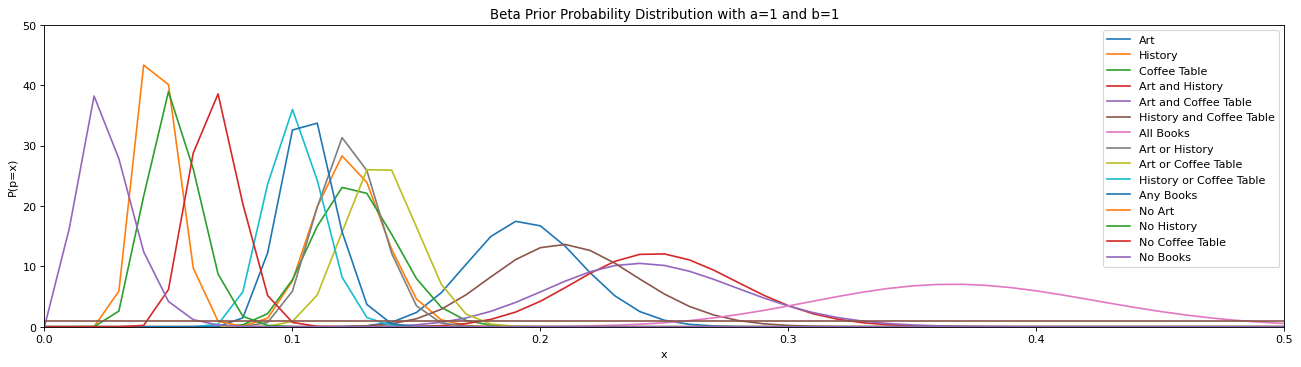

In [6]:
plt.figure(figsize=(20, 5), dpi=80)

delta_theta = 0.01
x = np.arange(0, 1, delta_theta)
param_prior_a = param_prior_b = 1
delta_theta = 0.01

prior_prob = beta.pdf(x=x, a=param_prior_a, b=param_prior_b)

for value in purchases.values() :
    param_n = len(value)
    param_k = sum(value.Purchase)
    L = binom.pmf(k=param_k, n=param_n, p=x)
    D_beta_prior = np.sum(L*prior_prob*delta_theta)
    P_beta_prior= L*prior_prob / D_beta_prior
    param_posterior_a = param_k + param_prior_a
    param_posterior_b = param_n - param_k + param_prior_b
    P_post = beta.pdf(x=x, a=param_posterior_a, b=param_posterior_b)
    ax = sns.lineplot(x=x, y=P_post)

labels = list(purchases.keys())
labels.append('Prior')
plt.legend(loc=1, labels=labels);
plt.ylim(0, 50)
plt.xlim(0, 0.5)
ax = sns.lineplot(x=x, y=prior_prob)
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Beta Prior Probability Distribution with a={param_prior_a} and b={param_prior_b}');


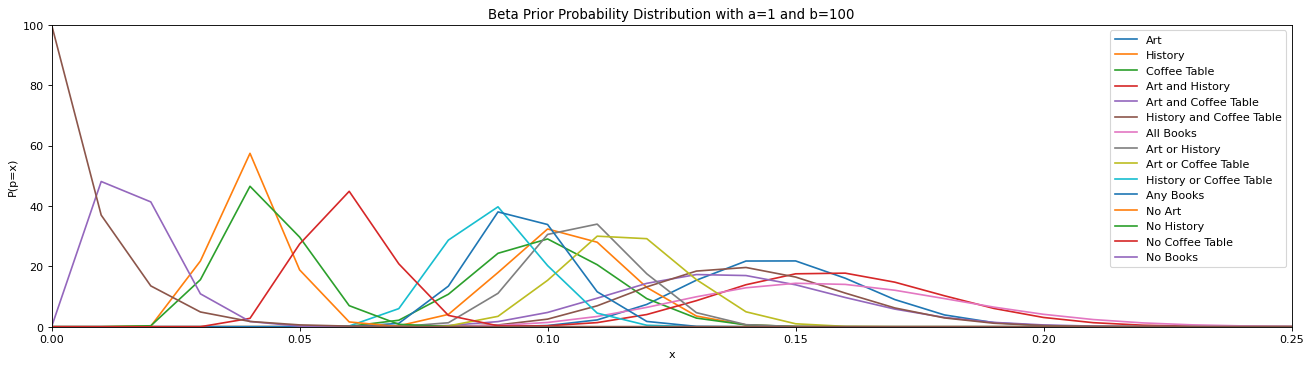

In [7]:
plt.figure(figsize=(20, 5), dpi=80)

param_prior_a = 1
param_prior_b = param_prior_a * 100

prior_prob = beta.pdf(x=x, a=param_prior_a, b=param_prior_b)

for value in purchases.values() :
    param_n = len(value)
    param_k = sum(value.Purchase)
    L = binom.pmf(k=param_k, n=param_n, p=x)
    D_beta_prior = np.sum(L*prior_prob*delta_theta)
    P_beta_prior= L*prior_prob / D_beta_prior
    param_posterior_a = param_k + param_prior_a
    param_posterior_b = param_n - param_k + param_prior_b
    P_post = beta.pdf(x=x, a=param_posterior_a, b=param_posterior_b)
    ax = sns.lineplot(x=x, y=P_post)

labels = list(purchases.keys())
labels.append('Prior')
plt.legend(loc=1, labels=labels);
plt.ylim(0, 100)
plt.xlim(0, 0.25)
ax = sns.lineplot(x=x, y=prior_prob)
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Beta Prior Probability Distribution with a={param_prior_a} and b={param_prior_b}');


Unsurprisingly, starting with a strong unlikely prior makes all cases signficantly less. Also, it seems like buying all books as usually a good indicator of the purchase.

Question 5) (20) The data set CHDdata.csv contains cases of coronary heart disease
(CHD) and variables associated with the patient’s condition: systolic
blood pressure, yearly tobacco use (in kg), low density lipoprotein (ldl),
adiposity, family history (0 or 1), type A personality score (typea), obesity
(body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).
Perform a Bayesian analysis of these data that finds the posterior marginal
probability distributions for the means for the data of patients with and
without CHD. You should first standard scale (subtract the mean and
divide by the standard deviation) all the numeric variables (remove family
history and do not scale CHD). Then separate the data into two sets, one
for patients with CHD and one for patients without CHD.</br></br>
Your priors for both groups should assume means of 0 for all variables
and a correlation of 0 between all pairs of variables. You should assume
all variances for the variables are 1. Use a prior alpha equal to one plus
the number of predictor variables. Compute and compare the Bayesian
estimates for the posterior means for each group.</br></br>
For 5 extra credit points, compute the probability of observing a point at
least as extreme as the posterior mean of patients without coronary heart
disease under the posterior distribution for the patients with coronary
heart disease. Then compute the probability of observing a point at least
as extreme as the posterior mean of patients with coronary heart disease
under the posterior distribution for the patients without coronary heart
disease.


In [8]:
chd = pd.read_csv('CHDdata.csv').drop('famhist', axis = 1)
p = len(chd.columns)-1
chd.iloc[: , :p]

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,49,25.30,97.20,52
1,144,0.01,4.41,28.61,55,28.87,2.06,63
2,118,0.08,3.48,32.28,52,29.14,3.81,46
3,170,7.50,6.41,38.03,51,31.99,24.26,58
4,134,13.60,3.50,27.78,60,25.99,57.34,49
...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,64,28.45,0.00,58
458,182,4.20,4.41,32.10,52,28.61,18.72,52
459,108,3.00,1.59,15.23,40,20.09,26.64,55
460,118,5.40,11.61,30.79,64,27.35,23.97,40


In [9]:
for column in chd.columns[0:p]:
    chd[column] = (chd[column] - np.mean(chd[column])) / np.std(chd[column])

In [10]:
positive = chd[chd.chd == 1]
negative = chd[chd.chd == 0]

In [11]:
positive.mean()[0:p].values

array([0.26426823, 0.41177089, 0.36139839, 0.34912802, 0.14172199,
       0.13751694, 0.0859086 , 0.51241433])

In [12]:
r = np.identity(p)
v = 1
mu_0 = np.zeros(p)

In [13]:
def multivar_post(data):
    xbar = data.mean()[0:p].values
    S = data.drop(columns="chd").cov().to_numpy()
    N = len(data)
    mu_star = (v*mu_0 + N * xbar) / (v + N)
    r_star = r + S + v*N / (v + N) * (mu_0-xbar) * np.transpose(mu_0-xbar) 
    return mu_star, np.linalg.inv(r_star)

In [14]:
post = {
    'Positive' : multivar_post(positive),
    'Negative' : multivar_post(negative)
}

In [15]:
for key, value in post.items():
    print('Values for CHD '+key+' Patients:')
    for i, column in enumerate(chd.columns[0:p]):
        print(f'{column} Mean: {value[0][i]:.2f}')
        print(f'{column} Variance: {value[1][i][i]:.2f}\n')

Values for CHD Positive Patients:
sbp Mean: 0.26
sbp Variance: 0.44

tobacco Mean: 0.41
tobacco Variance: 0.41

ldl Mean: 0.36
ldl Variance: 0.48

adiposity Mean: 0.35
adiposity Variance: 0.65

typea Mean: 0.14
typea Variance: 0.48

obesity Mean: 0.14
obesity Variance: 0.56

alcohol Mean: 0.09
alcohol Variance: 0.48

age Mean: 0.51
age Variance: 0.63

Values for CHD Negative Patients:
sbp Mean: -0.14
sbp Variance: 0.60

tobacco Mean: -0.22
tobacco Variance: 0.65

ldl Mean: -0.19
ldl Variance: 0.58

adiposity Mean: -0.18
adiposity Variance: 0.65

typea Mean: -0.07
typea Variance: 0.52

obesity Mean: -0.07
obesity Variance: 0.60

alcohol Mean: -0.05
alcohol Variance: 0.53

age Mean: -0.27
age Variance: 0.58



It looks like every listed parameter is a positive indicator for CHD. If you don't want CHD, don't get old kids.

In [31]:
for key, value in post.items():
    print(f'Probability for CHD {key} Patients:')
    for i, column in enumerate(chd.columns[0:p]):
        if key == 'Positive' :
            opp = post['Negative']
            print(f'{column} probability of value of {opp[0][i]:.2f} appearing: {norm.cdf(opp[0][i],value[0][i],value[1][i][i])*100:.2f}%')
        else : 
            opp = post['Positive']
            print(f'{column} probability of value of {opp[0][i]:.2f} appearing: {(1-norm.cdf(opp[0][i],value[0][i],value[1][i][i]))*100:.2f}%')
    print('\n')

Probability for CHD Positive Patients:
sbp probability of value of -0.14 appearing: 18.10%
tobacco probability of value of -0.22 appearing: 6.37%
ldl probability of value of -0.19 appearing: 12.38%
adiposity probability of value of -0.18 appearing: 20.85%
typea probability of value of -0.07 appearing: 32.51%
obesity probability of value of -0.07 appearing: 35.52%
alcohol probability of value of -0.05 appearing: 39.19%
age probability of value of -0.27 appearing: 10.87%


Probability for CHD Negative Patients:
sbp probability of value of 0.26 appearing: 25.17%
tobacco probability of value of 0.41 appearing: 16.60%
ldl probability of value of 0.36 appearing: 17.05%
adiposity probability of value of 0.35 appearing: 20.58%
typea probability of value of 0.14 appearing: 33.84%
obesity probability of value of 0.14 appearing: 36.34%
alcohol probability of value of 0.09 appearing: 40.32%
age probability of value of 0.51 appearing: 8.83%




Question 6) (15) Using the Python Notebook https://www.kaggle.com/billbasener/pt2-probabilities-likelihoods-and-bayes-theorem, complete the challenge question from Section 6: Modify the code from Section 5 to and add the ability
to use the posterior from conjugate prior function to output the posterior probability parameters given parameters and for a Gaussian Likelihood with known variance $\sigma^2$, and use your modified function to create
the Prior, Likelihood, Posterior plots as in Section 5 of the notebook.


In [32]:
delta_x = 0.01
x = np.arange(-100, 200, delta_x)

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
    
    elif kwargs['Likelihood_Dist_Type'] == 'Gaussian_Known_Variance':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        mu = kwargs['mu'] # This is the known mean.
        var = kwargs['var'] # This is the known variance.
        n = kwargs['n'] # This is the number of trials.
        prior_mu = kwargs['prior_mu'] # This is the prior mean.
        prior_var = kwargs['prior_var'] # This is the prior variance.
        
        post_mu = (1 / ((1/prior_var) + (n/var))) * (prior_mu / var + mu*n/var)
        post_var = (1/prior_var + n/var)**(-1)
        
        Likelihood = norm.pdf(x=x,loc=mu,scale=var)
        Prior = norm.pdf(x=x,loc=prior_mu,scale=prior_var)
        Posterior = norm.pdf(x=x,loc=post_mu,scale=post_var)
        
        return [Prior, Likelihood, Posterior]
    
    else:
        print('Distribution type not supported.') 
        return -1, -1, -1
        

In [33]:
x = np.arange(-100, 200, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, n=2000, prior_mu=0, prior_var=1)    

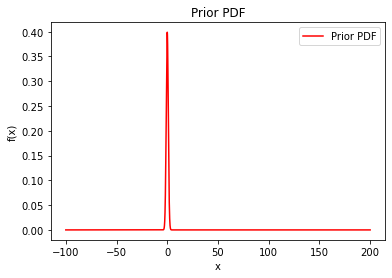

In [34]:
ax1 = sns.lineplot(x=x, y=Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

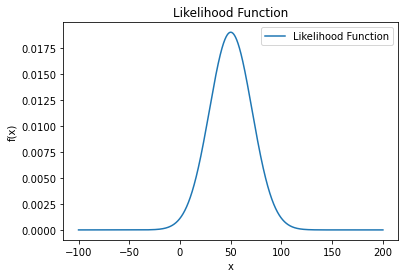

In [35]:
ax2 = sns.lineplot(x=x, y=Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

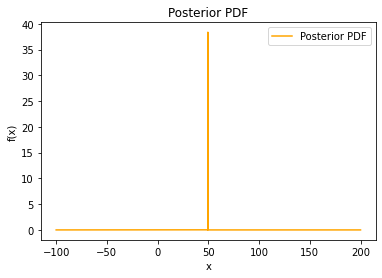

In [36]:
ax3 = sns.lineplot(x=x, y=Posterior, color='orange')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend(labels=['Posterior PDF']);
plt.show()

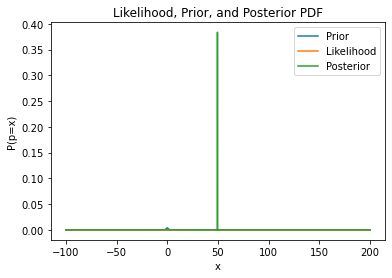

In [39]:
Probs = posterior_from_conjugate_prior(Likelihood_Dist_Type='Gaussian_Known_Variance', x=x, mu=50, var=21, n=2000, prior_mu=0, prior_var=1)    

for value in Probs :
    
    ax = sns.lineplot(x=x, y=value*delta_theta)
    
ax.set(xlabel='x', ylabel='P(p=x)', title=f'Likelihood, Prior, and Posterior PDF');
plt.legend(loc=1, labels=['Prior', 'Likelihood', 'Posterior']);